In [18]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mastercard import dist_visualisation, dist_categorical_visualisation

In [19]:
PROCESSED_DATA = Path("../data/processed/")

In [20]:
df = pd.read_parquet(PROCESSED_DATA / "transactions.parquet")

In [21]:
df.shape


(500000, 14)

In [22]:
df.dtypes

transaction_id                    object
timestamp                 datetime64[ns]
user_id                           object
merchant_id                       object
amount                           float64
channel                           object
currency                          object
device                            object
location                          object
payment_method                    object
is_international                   int64
session_length_seconds             int64
is_first_time_merchant             int64
is_fraud                           int64
dtype: object

In [23]:
df.sample(10)


,transaction_id,timestamp,user_id,merchant_id,amount,channel,currency,device,location,payment_method,is_international,session_length_seconds,is_first_time_merchant,is_fraud
18357,TX018357,2022-08-06 11:17:00,U08665,M0476,10.91,mobile,EUR,Android,"{'lat': 62.24846, 'long': 28.564719}",credit_card,1,929,1,0
301601,TX301601,2023-12-09 16:34:00,U04252,M0914,46.74,mobile,EUR,Web,"{'lat': 56.49138, 'long': 0.186772}",credit_card,1,598,1,1
228946,TX228946,2023-06-06 19:42:00,U17011,M0769,15.87,online,EUR,Web,"{'lat': 62.497571, 'long': 37.431185}",mobile_payment,1,941,0,1
314774,TX314774,2022-04-10 06:36:00,U07006,M0513,107.93,mobile,EUR,Android,"{'lat': 52.694268, 'long': -9.177724}",mobile_payment,1,225,1,1
49609,TX049609,2023-07-04 09:36:00,U15014,M0204,3.24,in-store,EUR,iOS,"{'lat': 67.557978, 'long': 34.215584}",debit_card,1,108,0,1
233235,TX233235,2022-01-25 00:08:00,U01266,M0570,260.09,mobile,EUR,Web,"{'lat': 59.61785, 'long': 21.546151}",bank_transfer,1,1029,1,0
107541,TX107541,2023-01-18 15:29:00,U02480,M0486,14.27,online,EUR,Web,"{'lat': 44.787039, 'long': -4.092074}",credit_card,1,792,1,0
350418,TX350418,2023-07-25 20:45:00,U16517,M0603,3.26,mobile,EUR,Android,"{'lat': 46.192258, 'long': 26.301771}",credit_card,1,434,1,1
403598,TX403598,2023-01-05 12:34:00,U17876,M0086,44.45,online,EUR,Android,"{'lat': 47.755459, 'long': 30.76985}",credit_card,1,1112,1,0
262200,TX262200,2023-04-24 09:40:00,U02591,M0825,36.16,in-store,EUR,Web,"{'lat': 67.868819, 'long': 33.604263}",bank_transfer,1,334,0,0


In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   transaction_id          500000 non-null  object        
 1   timestamp               500000 non-null  datetime64[ns]
 2   user_id                 500000 non-null  object        
 3   merchant_id             500000 non-null  object        
 4   amount                  500000 non-null  float64       
 5   channel                 500000 non-null  object        
 6   currency                500000 non-null  object        
 7   device                  500000 non-null  object        
 8   location                500000 non-null  object        
 9   payment_method          500000 non-null  object        
 10  is_international        500000 non-null  int64         
 11  session_length_seconds  500000 non-null  int64         
 12  is_first_time_merchant  500000

## Descriptive statistics
- univariate analysis
- bivariate analysis
- multivariate analysis

In [25]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
timestamp,500000,2022-12-31 16:45:04.497720576,2022-01-01 00:06:00,2022-07-01 11:03:45,2022-12-31 20:08:30,2023-07-02 08:45:15,2023-12-31 23:57:00,NaN
amount,500000.0,49.915662,0.0,14.37,34.56,69.1725,714.86,49.990657
is_international,500000.0,0.928662,0.0,1.0,1.0,1.0,1.0,0.257389
session_length_seconds,500000.0,614.987182,30.0,323.0,614.0,907.0,1200.0,338.091496
is_first_time_merchant,500000.0,0.501248,0.0,0.0,1.0,1.0,1.0,0.499999
is_fraud,500000.0,0.084822,0.0,0.0,0.0,0.0,1.0,0.278617


### Target variable

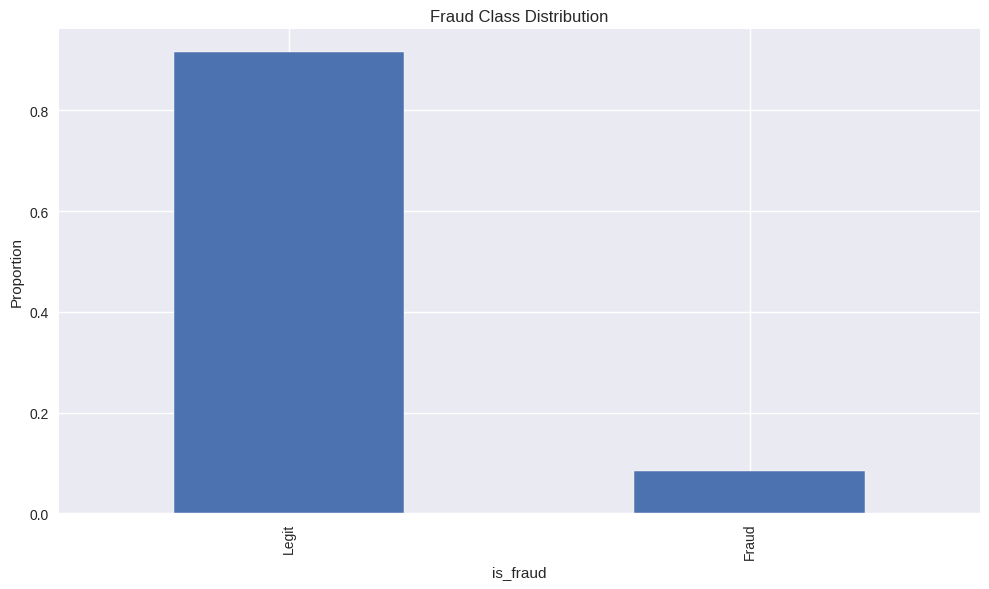

In [26]:
fraud_counts = df["is_fraud"].value_counts(normalize=True)
fig, ax = plt.subplots(figsize=(10, 6))
fraud_counts.plot(kind="bar", ax=ax)
ax.set_title("Fraud Class Distribution")
ax.set_xticks([0,1])
ax.set_xticklabels(["Legit", "Fraud"])
ax.set_ylabel("Proportion")
plt.tight_layout()
plt.show()

##### Summary: Class distribution is highly inbalanced

- accuracy—will be misleading
- use metrics like F1-score, Recall, ROC-AUC
- consider resampling (undersample, oversampling)
- use algorithms with built-in support for imbalanced data(e.g. XGBoost)

## Numerical features

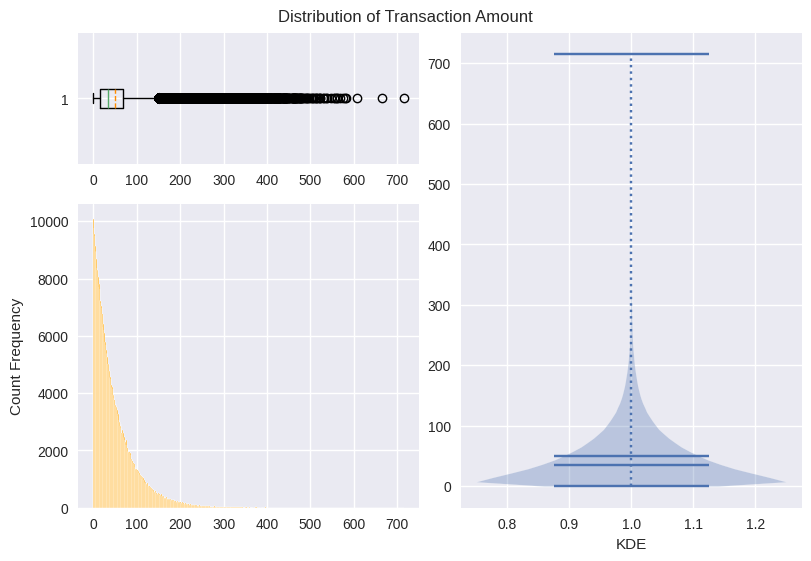

In [27]:
dist_visualisation(df["amount"], title="Distribution of Transaction Amount")

In [28]:
df.loc[df["amount"] < 1, "amount"].count() # duzo transacji poniżej dolara


np.int64(9986)

In [29]:
df["amount"].describe()


count    500000.000000
mean         49.915662
std          49.990657
min           0.000000
25%          14.370000
50%          34.560000
75%          69.172500
max         714.860000
Name: amount, dtype: float64

#### Summary: amount is strongly right-skewed with a long tail, this suggests the presence of outliers'
- recomendation: apply log transformation (eg. log1p) for algorithms sensitivev to distribution shape

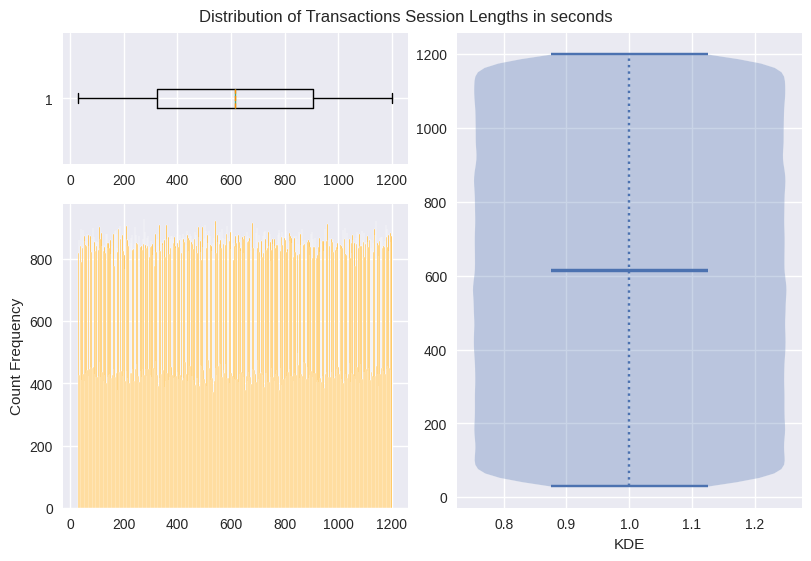

In [30]:
dist_visualisation(df["session_length_seconds"], title="Distribution of Transactions Session Lengths in seconds")

#### Summary: session_length_seconds is uniform distributed, wich is unusual in real behavioral data
- indicates synthetic generation or flattening
- low predictive power unless frauds are concentrated in specific ranges(to be checked later)


## Categorical Features

In [31]:
df.dtypes

transaction_id                    object
timestamp                 datetime64[ns]
user_id                           object
merchant_id                       object
amount                           float64
channel                           object
currency                          object
device                            object
location                          object
payment_method                    object
is_international                   int64
session_length_seconds             int64
is_first_time_merchant             int64
is_fraud                           int64
dtype: object

In [32]:
categorical_cols = ["channel", "currency", "device", "payment_method", "is_international", "is_first_time_merchant"]

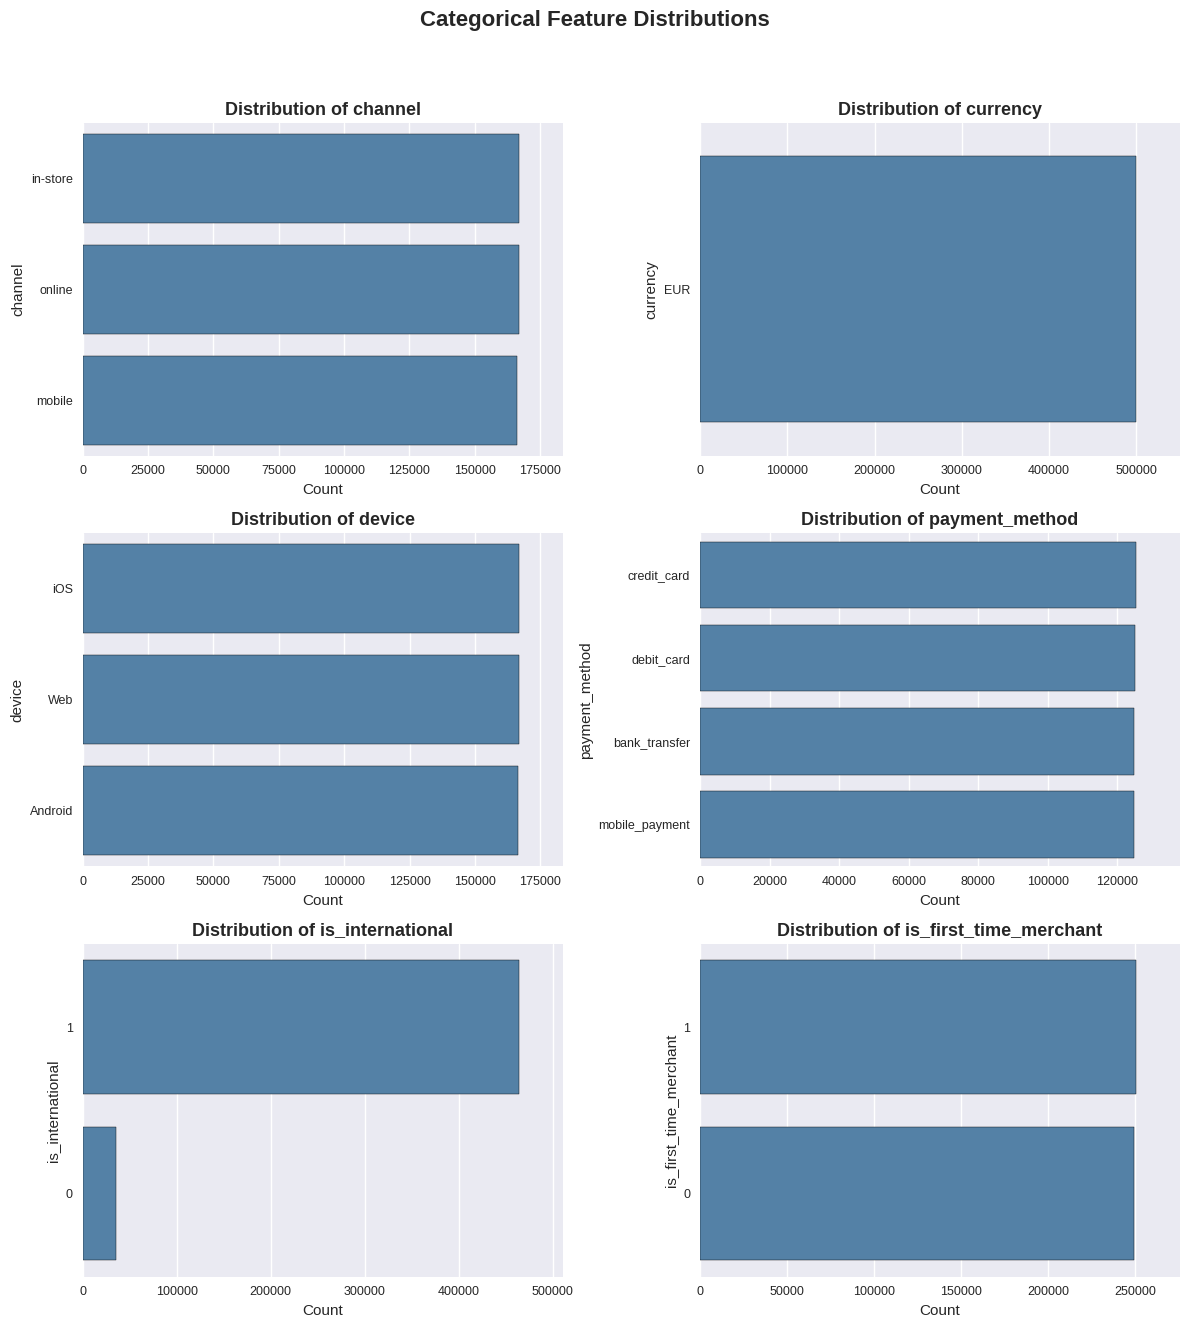

In [34]:
fig, ax = dist_categorical_visualisation(df, categorical_cols)

In [35]:
df["channel"].value_counts()

channel
in-store    167027
online      166847
mobile      166126
Name: count, dtype: int64

#### Summary:
- channel, device, payment_method , show almost perfectly balanced category distribution
    - unusual in real-world data and indicates synthetic balancing on control generation
- currency has only one value, making it non informative
    - recomendation: drop this feature

## Multivarient analysis



In [36]:
### Amount vs is_fraud

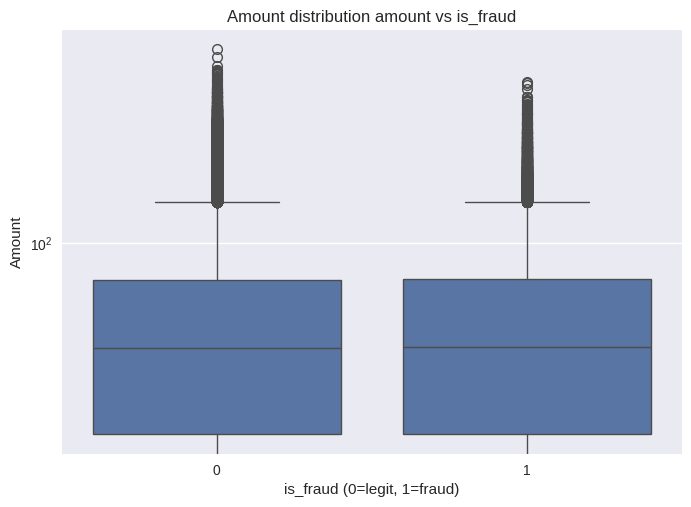

In [38]:
fig, ax = plt.subplots()
sns.boxplot(x="is_fraud", y="amount", data=df, ax=ax)
ax.set_title("Amount distribution amount vs is_fraud")
ax.set_xlabel("is_fraud (0=legit, 1=fraud)")
ax.set_ylabel("Amount")
ax.set_yscale("log") # stosować gdy jest dużo outlierów

plt.show()

#### Summary:
- amount is not discriminating feature by itself for fraud detection
- distribution are very similar
- my still be usefull when combinate with other features

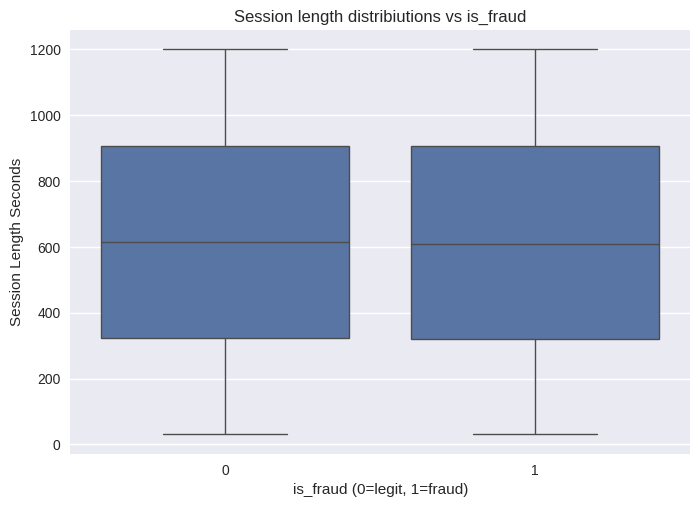

In [39]:
fig, ax = plt.subplots()
sns.boxplot(x="is_fraud", y="session_length_seconds", data=df, ax=ax)
ax.set_title("Session length distribiutions vs is_fraud")
ax.set_xlabel("is_fraud (0=legit, 1=fraud)")
ax.set_ylabel("Session Length Seconds")
plt.show()